In [72]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
%matplotlib inline

In [73]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [74]:
data = pd.read_csv("C:/Users/Cyrileoo/Desktop/diesel prices in kenya from 2010- 2022 - Sheet1.csv")
data.head()

,Date,Diesel
0,2010-01-14,87.45
1,2011-01-14,88.71
2,2011-02-14,91.72
3,2011-03-14,94.53
4,2011-04-14,107.52


In [75]:
data.tail()

,Date,Diesel
133,2022-01-14,110.6
134,2022-02-14,110.6
135,2022-03-14,115.6
136,2022-04-14,125.5
137,2022-05-14,131.0


In [76]:
data.describe()

,Diesel
count,138.000000
mean,97.701377
std,12.191943
min,65.700000
25%,88.710000
50%,101.935000
75%,106.045000
max,131.000000


In [77]:
data.dtypes

Date       object
Diesel    float64
dtype: object

In [78]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date      datetime64[ns]
Diesel           float64
dtype: object

In [79]:
indexedData = data.set_index('Date')
indexedData.head()

,Diesel
Date,
2010-01-14,87.45
2011-01-14,88.71
2011-02-14,91.72
2011-03-14,94.53
2011-04-14,107.52


Text(0, 0.5, 'Diesel prices in Ksh')

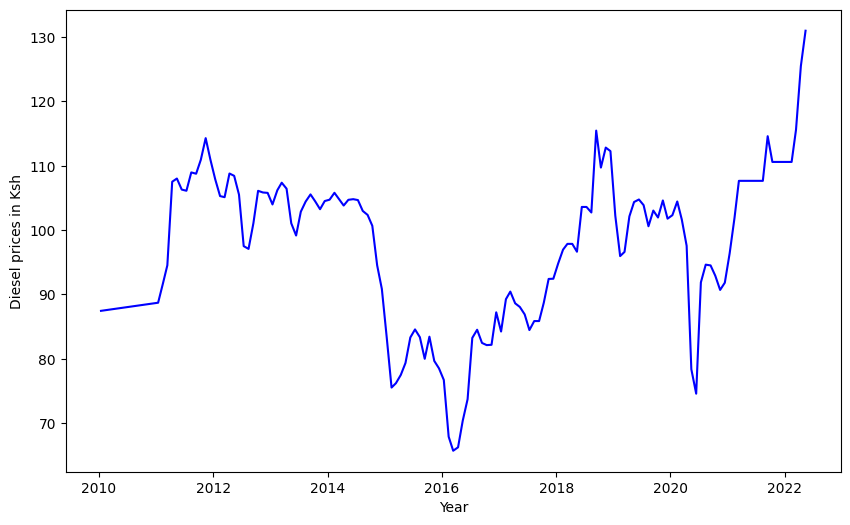

In [114]:
plt.plot(indexedData, color='blue')
plt.xlabel('Year')
plt.ylabel('Diesel prices in Ksh')

Text(0.5, 1.0, '4 Months Moving Average')

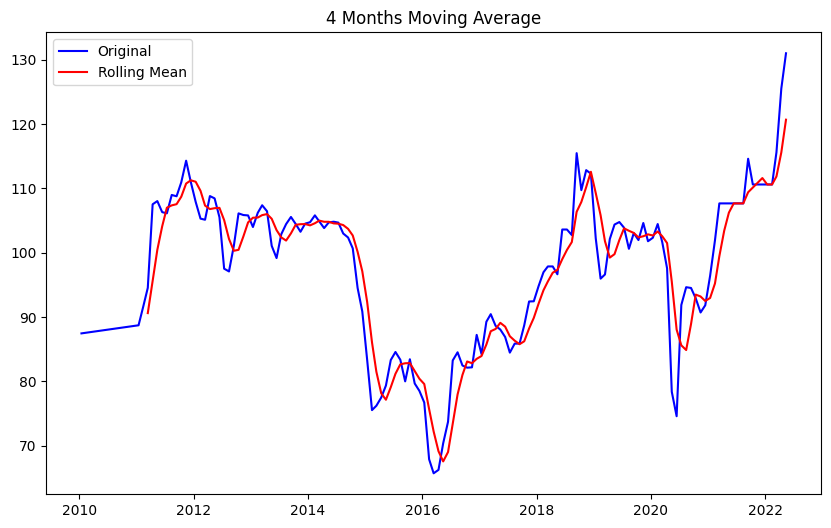

In [81]:
four_months_moving_average = indexedData.rolling(window=4).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(four_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('4 Months Moving Average')

Text(0.5, 1.0, '6 Months Moving Average')

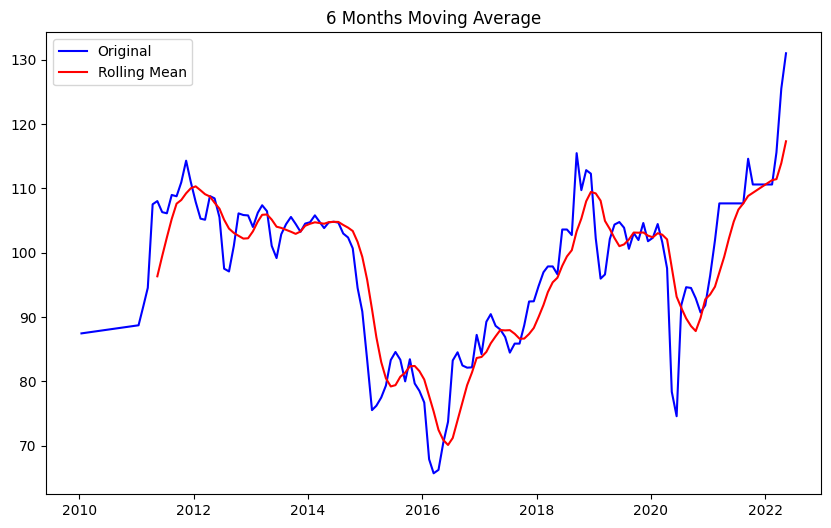

In [82]:
six_months_moving_average = indexedData.rolling(window=6).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(six_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')

Text(0.5, 1.0, '8 Months Moving Average')

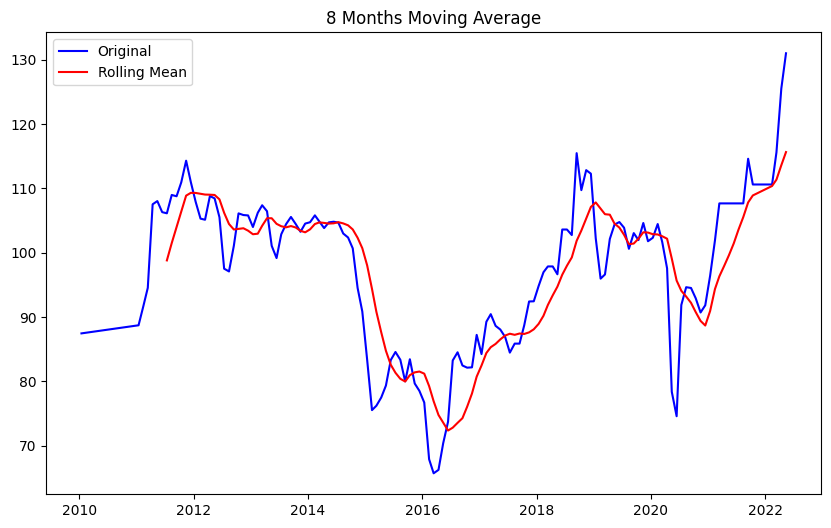

In [83]:
eight_months_moving_average = indexedData.rolling(window=8).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(eight_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('8 Months Moving Average')

Text(0.5, 1.0, '12 Months Moving Average')

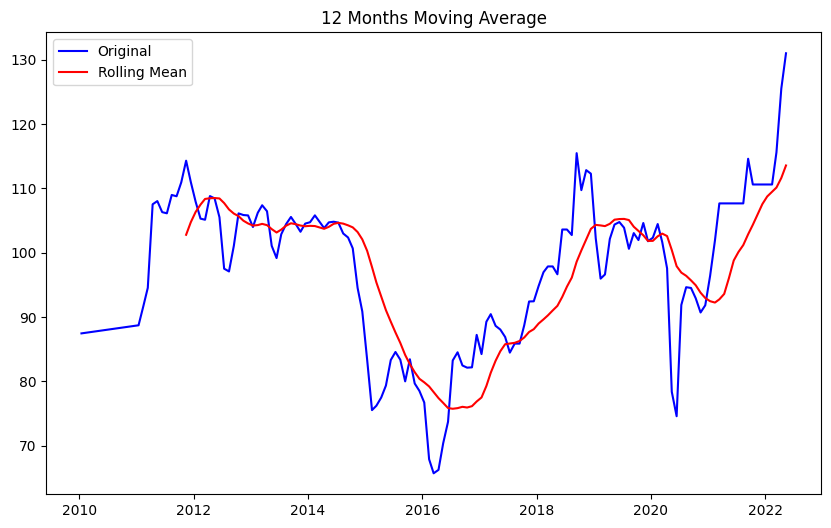

In [84]:
twelve_months_moving_average = indexedData.rolling(window=12).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(twelve_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')

In [85]:
rolmean = indexedData.rolling(window=12).mean()

Text(0.5, 1.0, 'Mean')

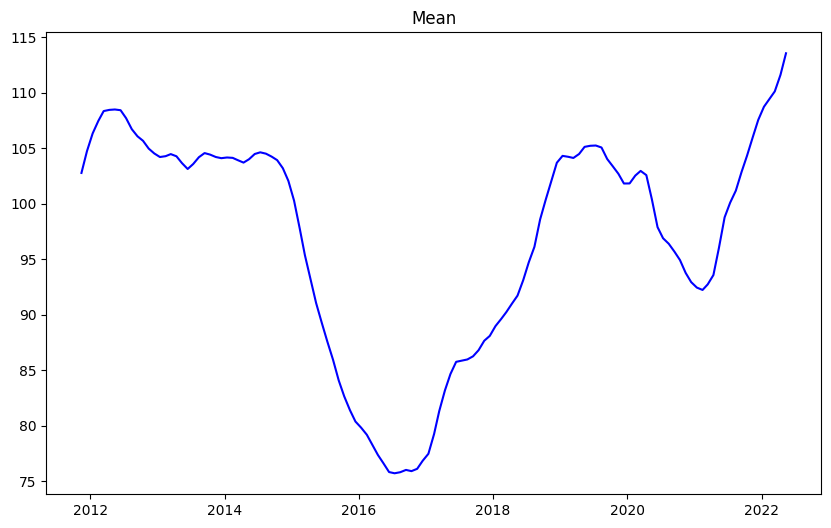

In [86]:
plt.plot(rolmean, 'blue')
plt.title('Mean')

In [87]:
rolstd = indexedData.rolling(window=12).std()

Text(0.5, 1.0, 'Standard Deviation')

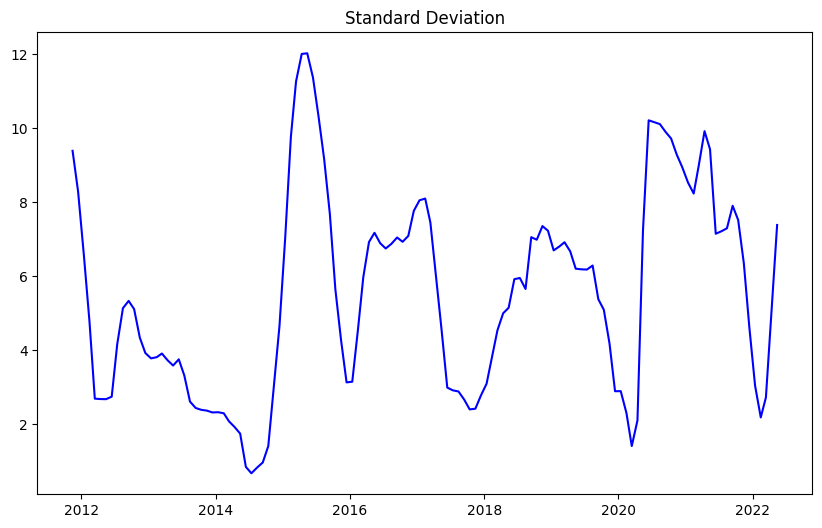

In [88]:
plt.plot(rolstd, 'blue')
plt.title('Standard Deviation')

In [115]:
dftest = adfuller(indexedData['Diesel'], autolag='AIC')

In [116]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

In [91]:
dfoutput

Test Statistic                  -1.912219
p-value                          0.326335
No. of Lags used                 1.000000
Number of observations used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64

In [117]:
def test_stationary(timeseries):
    
    # Rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation\n')
    plt.show(block=False)
    
    # Dickey Fuller test
    print('Results of Dickey Fuller Test:\n')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

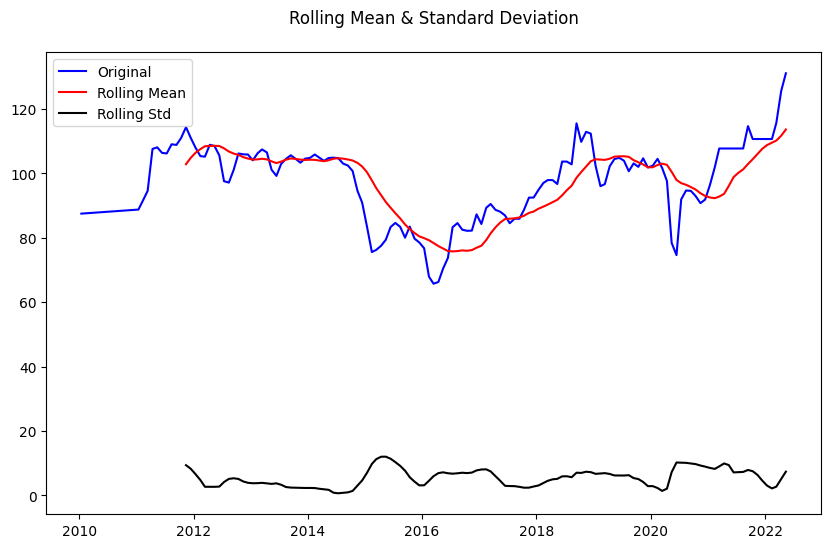

Results of Dickey Fuller Test:

Test Statistic                  -1.912219
p-value                          0.326335
No. of Lags used                 1.000000
Number of observations used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [93]:
test_stationary(indexedData)

In [94]:
indexedData_logScale= np.log(indexedData)

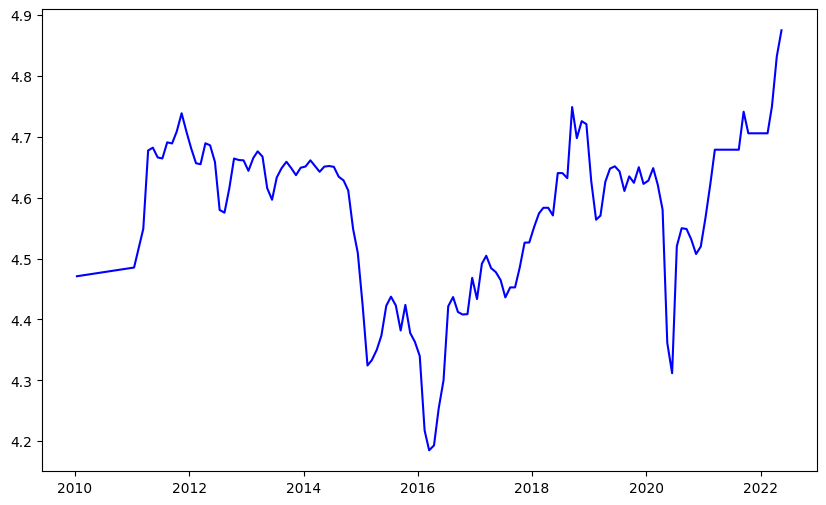

In [95]:
plt.plot(indexedData_logScale, 'blue')

In [96]:
movingAverage = indexedData_logScale.rolling(window=12).mean()
movingSTD = indexedData_logScale.rolling(window=12).std()

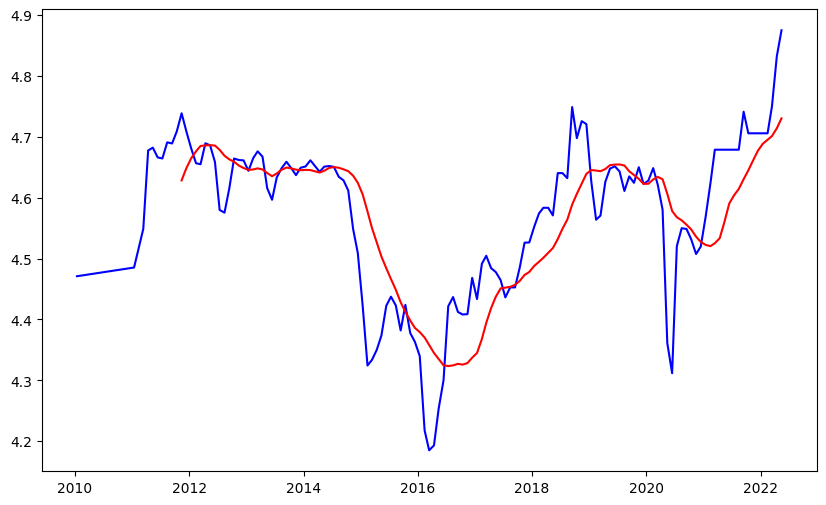

In [97]:
plt.plot(indexedData_logScale, color='blue')
plt.plot(movingAverage, color='red')

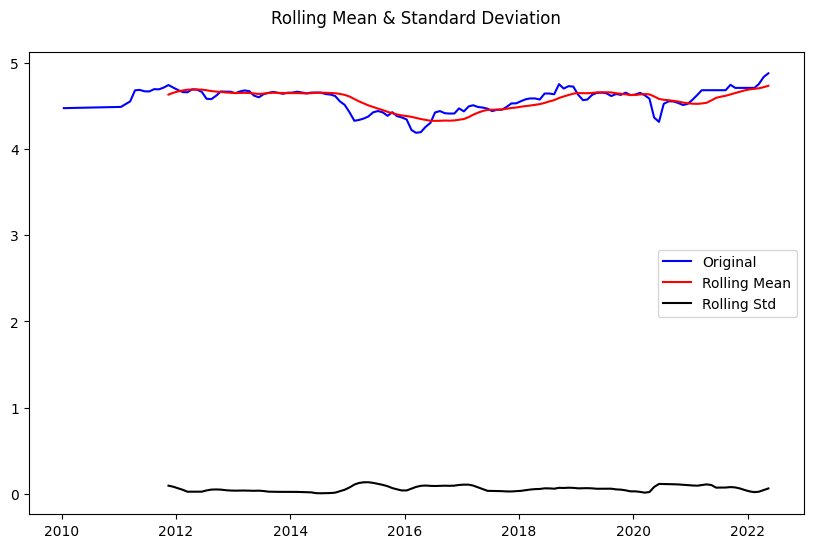

Results of Dickey Fuller Test:

Test Statistic                  -1.774282
p-value                          0.393303
No. of Lags used                 2.000000
Number of observations used    135.000000
Critical Value (1%)             -3.479743
Critical Value (5%)             -2.883198
Critical Value (10%)            -2.578320
dtype: float64


In [98]:
test_stationary(indexedData_logScale)

In [99]:
dataLogScaleMinusMovingAverage = indexedData_logScale - movingAverage
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head()

,Diesel
Date,
2011-11-14,0.110239
2011-12-14,0.060906
2012-01-14,0.016441
2012-02-14,-0.019544
2012-03-14,-0.030008


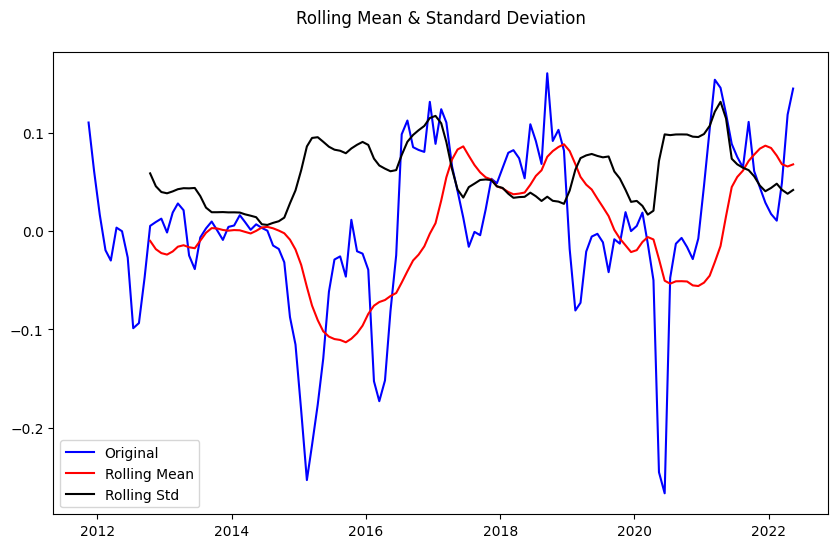

Results of Dickey Fuller Test:

Test Statistic                  -4.105795
p-value                          0.000947
No. of Lags used                 1.000000
Number of observations used    125.000000
Critical Value (1%)             -3.483779
Critical Value (5%)             -2.884954
Critical Value (10%)            -2.579257
dtype: float64


In [100]:
test_stationary(dataLogScaleMinusMovingAverage)

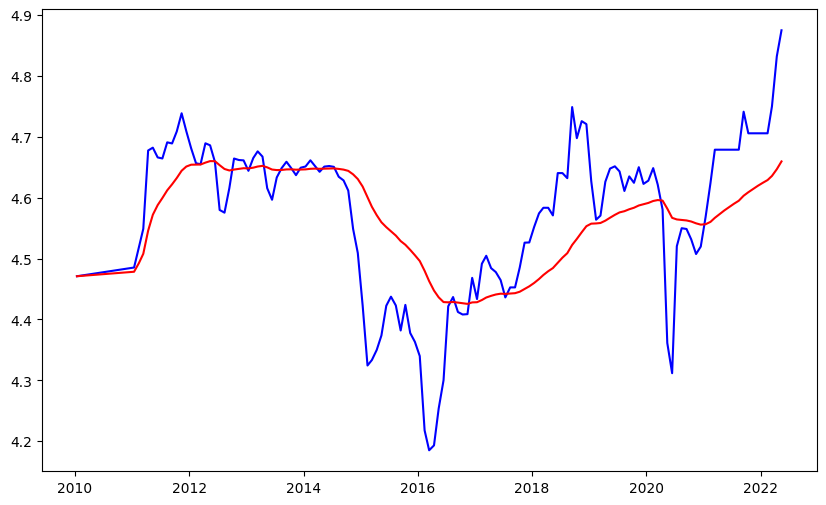

In [101]:
exponentialDecayWeightedAverage = indexedData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedData_logScale, 'blue')
plt.plot(exponentialDecayWeightedAverage, 'red')

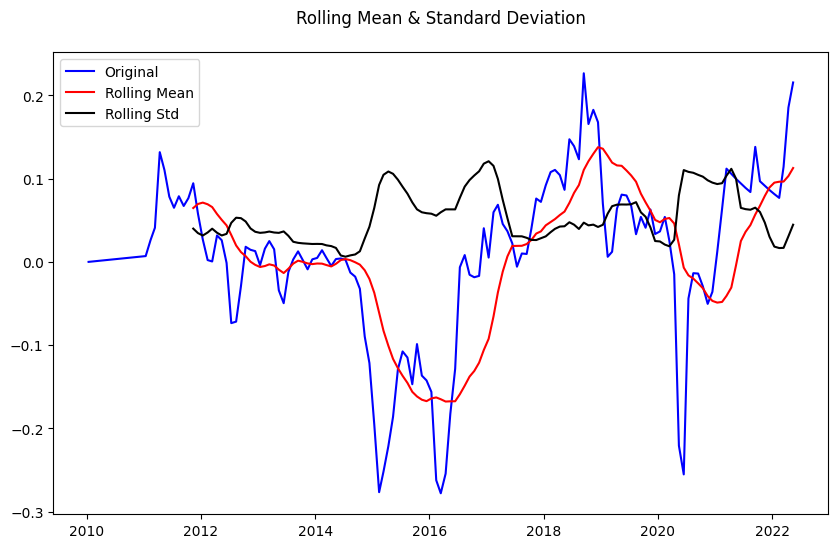

Results of Dickey Fuller Test:

Test Statistic                  -2.869231
p-value                          0.049045
No. of Lags used                 1.000000
Number of observations used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


In [102]:
dataLogScaleMinusMovingExponentialDecayAverage = indexedData_logScale - exponentialDecayWeightedAverage
test_stationary(dataLogScaleMinusMovingExponentialDecayAverage)

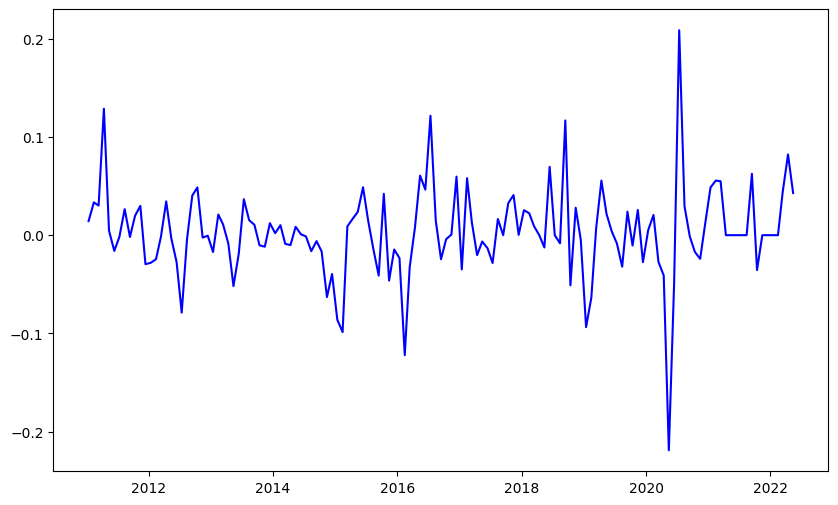

In [103]:
dataLogDiffShifting = indexedData_logScale - indexedData_logScale.shift()
plt.plot(dataLogDiffShifting, color='blue')

In [109]:
dataLogDiffShifting.dropna(inplace=True)

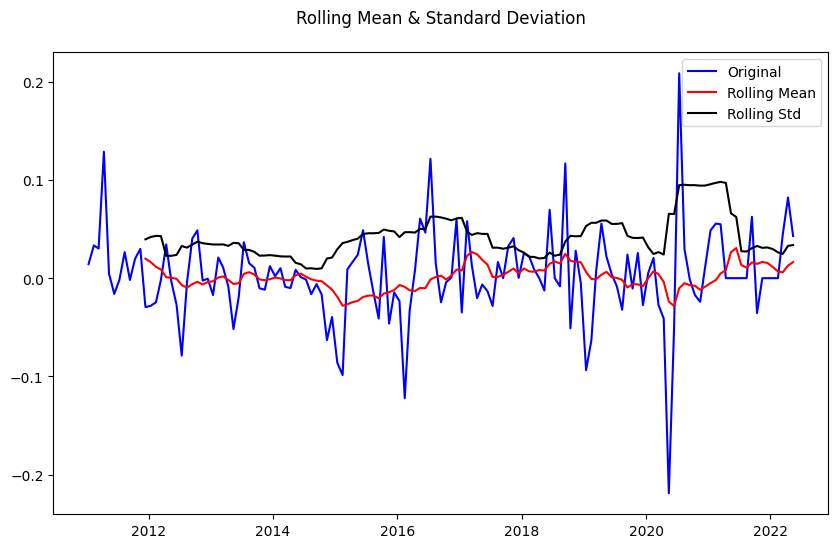

Results of Dickey Fuller Test:

Test Statistic                -7.357343e+00
p-value                        9.702177e-11
No. of Lags used               3.000000e+00
Number of observations used    1.330000e+02
Critical Value (1%)           -3.480500e+00
Critical Value (5%)           -2.883528e+00
Critical Value (10%)          -2.578496e+00
dtype: float64


In [110]:
test_stationary(dataLogDiffShifting)

In [148]:
decomposition = seasonal_decompose (indexedData_logScale)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

AttributeError: 'AxesSubplot' object has no attribute 'set_figwidth'

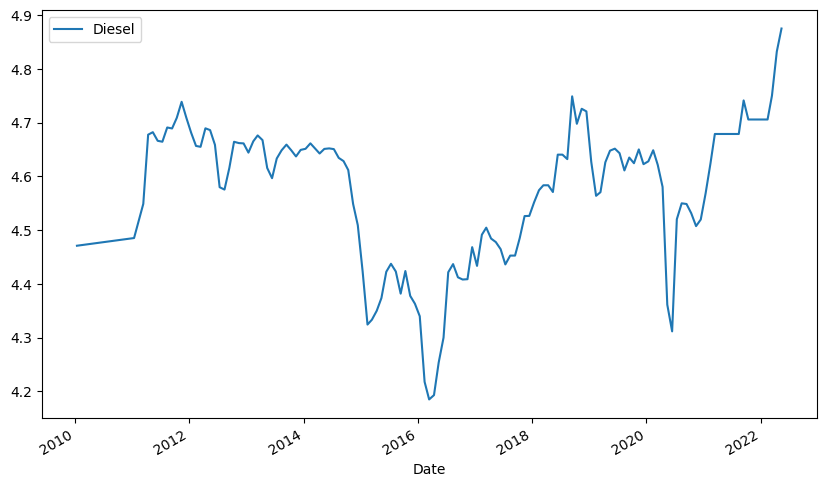

In [134]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.suptitle('Decomposition of multiplicative time series')

In [135]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

NameError: name 'residual' is not defined

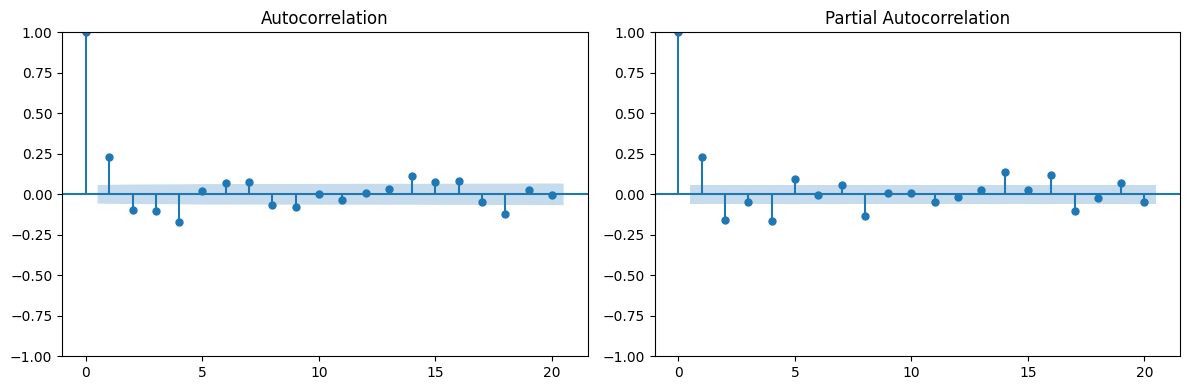

In [139]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
plot_acf(dataLogDiffShifting, lags=20, ax=axes[0], alpha=0.5)
plot_pacf(dataLogDiffShifting, lags=20, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [140]:
model = ARIMA(indexedData_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataLogDiffShifting, color='blue')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_ARIMA.fittedvalues - dataLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [141]:
model = ARIMA(indexedData_logScale, order=(2,1,0))
results_AR = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_AR.fittedvalues - dataLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [142]:
model = ARIMA(indexedData_logScale, order=(0,1,2))
results_MA = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_MA.fittedvalues - dataLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [143]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

NameError: name 'results_ARIMA' is not defined

In [144]:
plt.plot(predictions_ARIMA_diff)

NameError: name 'predictions_ARIMA_diff' is not defined

In [145]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

NameError: name 'predictions_ARIMA_diff' is not defined

In [146]:
predictions_ARIMA_log = pd.Series(indexedData_logScale['#Passengers'].ix[0], index=indexedData_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

KeyError: '#Passengers'

In [147]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedData)
plt.plot(predictions_ARIMA)

NameError: name 'predictions_ARIMA_log' is not defined